# Problem Statement
**Business Goal:**

*Global Mart is an online supergiant store that has worldwide operations. This store takes orders and delivers across the globe and deals with all the major product categories — consumer, corporate and home office.*

*As a sales manager for this store, you have to forecast the sales of the products for the next 6 months, so that you have a proper estimate and can plan your inventory and business processes accordingly.*

**Approach:**

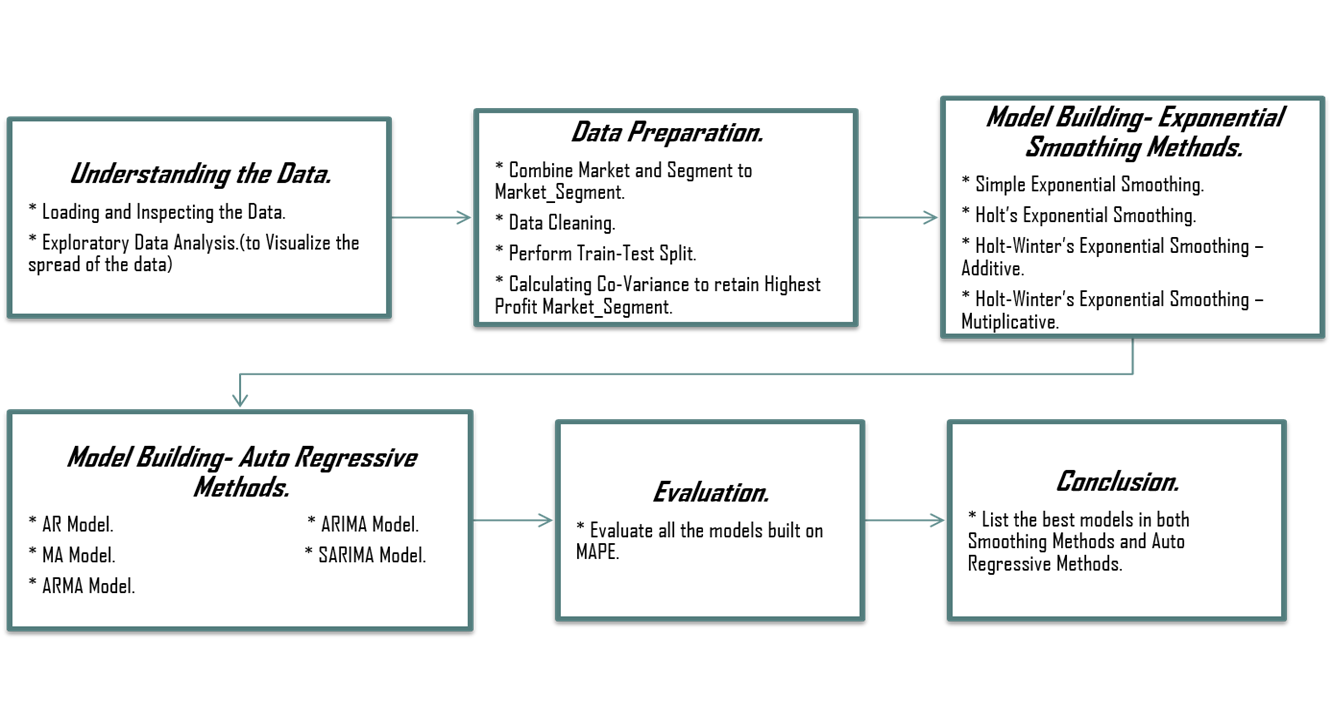

## 1. Importing the Required Libraries

In [1]:
# Importing the Required Libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
sns.set()

# setting up pandas to view large files
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

## *2. Loading the Data and Inspecting the Dataframe.*

In [2]:
# Importing csv file 'Global+Superstore+Data.csv' as global_store.
global_store = pd.read_csv('Global+Superstore+Data.csv')

# Checking the Dimensions of global_store.
print('--'*20)
print('Dimension:' , global_store.shape)
print('--'*20)

# Having a look at the data given.
global_store.head()

----------------------------------------
Dimension: (51290, 5)
----------------------------------------


,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


**We can see that the given data has 51290 Rows and 5 Columns.**

In [3]:
# global_store information
print('--'*30)
print(global_store.info())
print('--'*30)

# Now checking the Percentage of null values present in each columns in the data 'xleads'.
print('--'*30)
print(round(global_store.isnull().sum() * 100 / len(global_store) , 4).sort_values(ascending = False))
print('--'*30)

------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB
None
------------------------------------------------------------
------------------------------------------------------------
Profit        0.0
Sales         0.0
Market        0.0
Segment       0.0
Order Date    0.0
dtype: float64
------------------------------------------------------------


**We can see that there are no Null values present the given data set. Hence we won't be needed to perform Data Cleaning/ Data Processing.**

In [4]:
# Check the summary for the numeric columns.
global_store.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


In [5]:
# Merging 'Market' and 'Segment' columns to one 'Market_Segment' for the ease of nderstanding the Dataframe.

global_store['Market_Segment']= global_store['Market'] + '_' + global_store['Segment']
global_store.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,31-07-2012,Consumer,US,2309.650,762.1845,US_Consumer
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Africa_Consumer


In [6]:
print('--'*30)
print(global_store.nunique().sort_values())
print('--'*30)

------------------------------------------------------------
Segment               3
Market                7
Market_Segment       21
Order Date         1430
Sales             22995
Profit            24575
dtype: int64
------------------------------------------------------------


**We can see that there are 3 Segments and 7 Markets present in the Dataframe. Now when we combine the Market and Segment we have a total of 21 combinatiobns of Market_Segment, which we can use for EDA and model building.**

## *3. Exploratory Data Analysis.*
### *3.1 Univariative Analysis.*

In [7]:
# Definition for 'Countplot' to compare the distribution.

def countplot(i,r):
    
    plt.figure(figsize = (15,5))
        
    sns.set_style('darkgrid')
    prev = sns.countplot(i, data = global_store)
    plt.title('Distribution of {}'.format(i), fontsize = 15, fontweight = 'bold')
    plt.xlabel(i, fontsize = 14)
    plt.xticks(rotation = r,fontsize = 12, fontweight = 'bold')
    plt.ylabel('Total Counts', fontsize = 14)
    
    for p in prev.patches:
        percentage = f'{100 * p.get_height() / len(global_store):.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        prev.annotate(percentage, (x, y), ha='center', va='center')
    
    plt.tight_layout()
    plt.show()

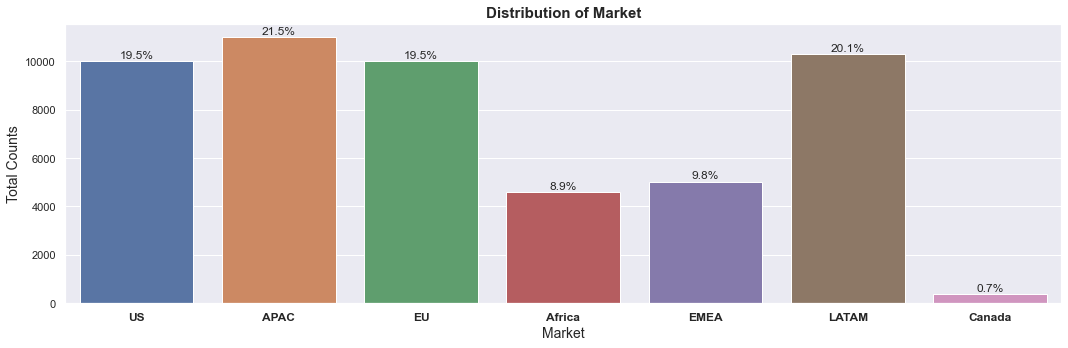

In [8]:
countplot('Market', 0)

#### Insights from the Graph:
* The maximum percentage of Markets are from **APAC** followed by **LATAM**, **EU** and **US**.
* Canada has the least percentage of Markets when compared with the data given.

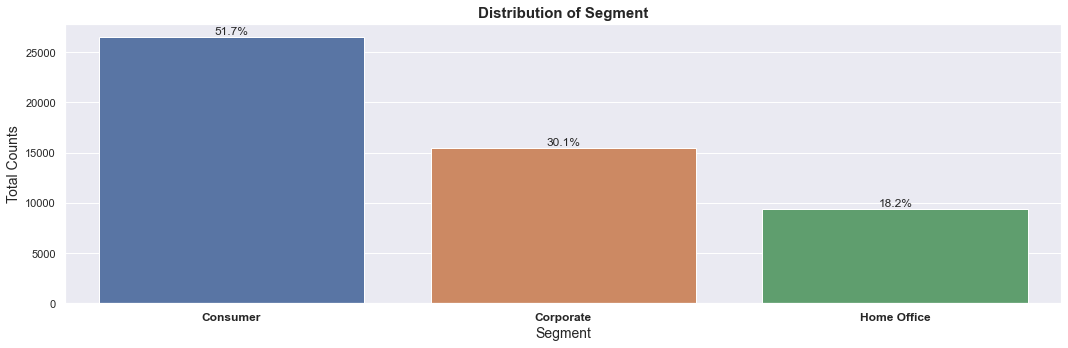

In [9]:
countplot('Segment', 0)

#### Insights from the Graph:
* The maximum percenage of Segements are from **Consumer**.

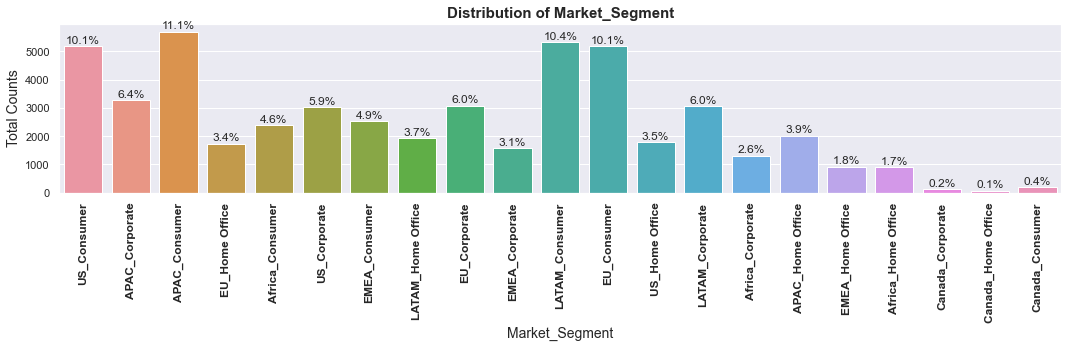

In [10]:
countplot('Market_Segment', 90)

#### Insights from the Graph:
* Here we can observe that the maximum percentage of Market_Segment is from **APAC_Consumer** followed by **LATAM_Consumer**.

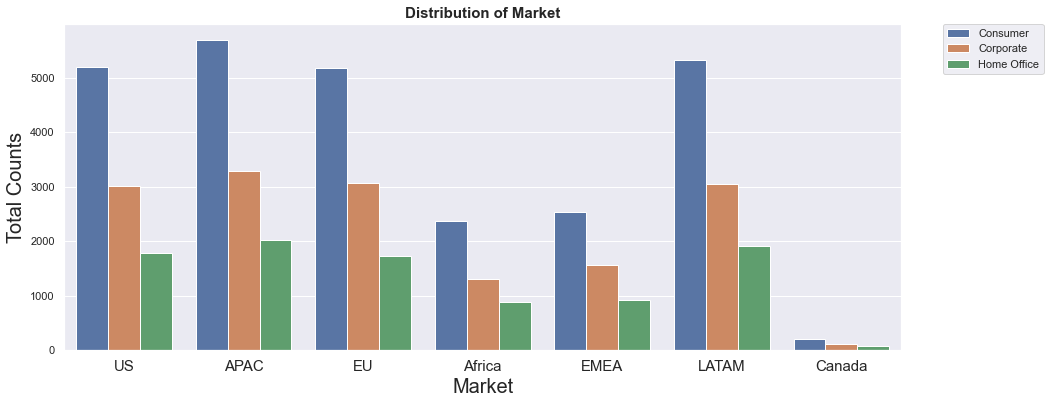

In [11]:
    
plt.figure(figsize = (15,6))
        
sns.set_style('darkgrid')
sns.countplot('Market', data = global_store, hue = 'Segment')
plt.title('Distribution of Market', fontsize = 15, fontweight = 'bold')
plt.xlabel('Market', fontsize = 20)
plt.xticks(rotation = 0,fontsize = 15)
plt.ylabel('Total Counts', fontsize = 20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#### Insights from the Graph:
* We can observe from the above plot that among the market segments **Consumer** has the highest percentage of numbers.

In [12]:
def distplot(i,R):
    
    plt.figure(figsize = (15,8))
        
    plt.subplot(2,1,1)
    sns.set_style('darkgrid')
    sns.distplot(global_store[~global_store[i].isna()][i], color="#4CB391")
    plt.title('{} Distribution'.format(i), fontsize = 15, fontweight = 'bold')
    plt.xlabel(i, fontsize = 12)
    plt.xticks(rotation = R,fontsize = 10)
    plt.ylabel('Total Count', fontsize = 12)
    
    plt.subplot(2,1,2)
    sns.set_style('darkgrid')
    sns.boxplot(global_store[~global_store[i].isna()][i], color="#4CB391")
    plt.title('{} Distribution'.format(i), fontsize = 15, fontweight = 'bold')
    plt.xlabel(i, fontsize = 12)
    plt.xticks(rotation = R,fontsize = 10)
    plt.ylabel('Total Count', fontsize = 12)
    
    
    plt.tight_layout()
    plt.show()

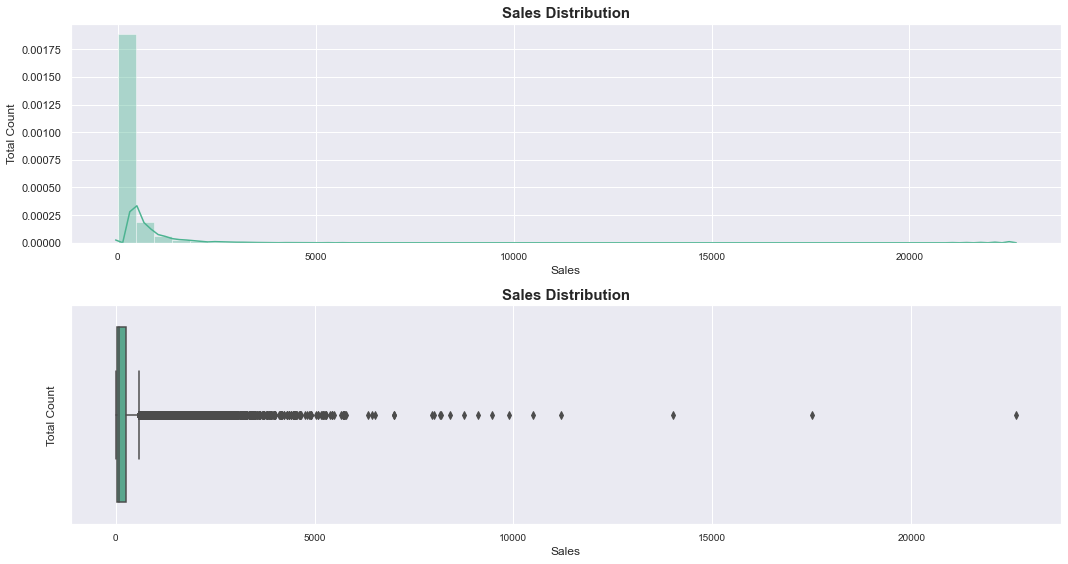

In [13]:
distplot('Sales', 0)

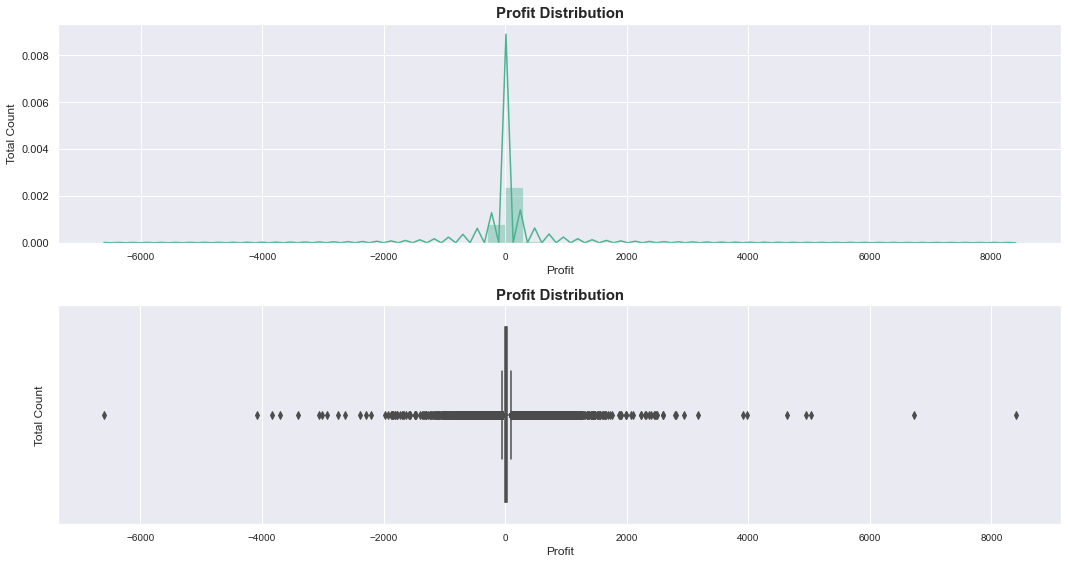

In [14]:
distplot('Profit', 0)

### *3.2 Bivariative Analysis.*

In [15]:
# Definition for 'Barplot' to compare the distribution.

def bar(i, j):
    plt.figure(figsize = (15,6))
    sns.barplot(x = i, y = j, hue = 'Segment', data = global_store)
    plt.title('{} Vs {}'.format(i, j), fontsize = 15, fontweight = 'bold')
    plt.legend(loc='best')
    plt.show()

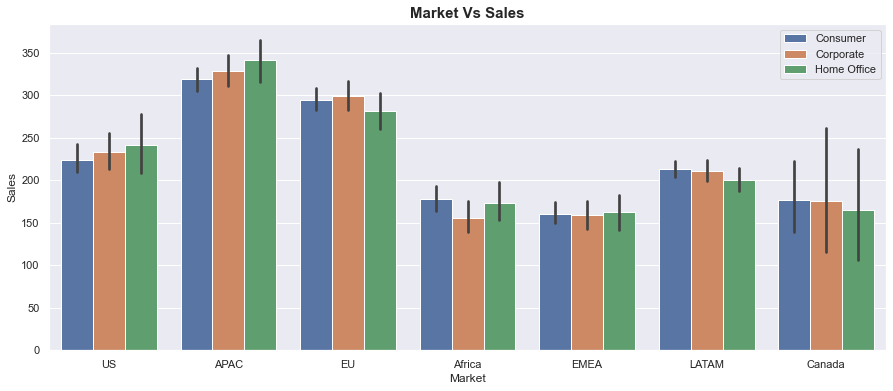

In [16]:
bar('Market', 'Sales')

#### Insights from the Graph:
* The Maximum sales were from the Market **'APAC'** followed by **'EU'**.
* The sales are good from Market **'Canada'** even though the total number of Markets are very less.

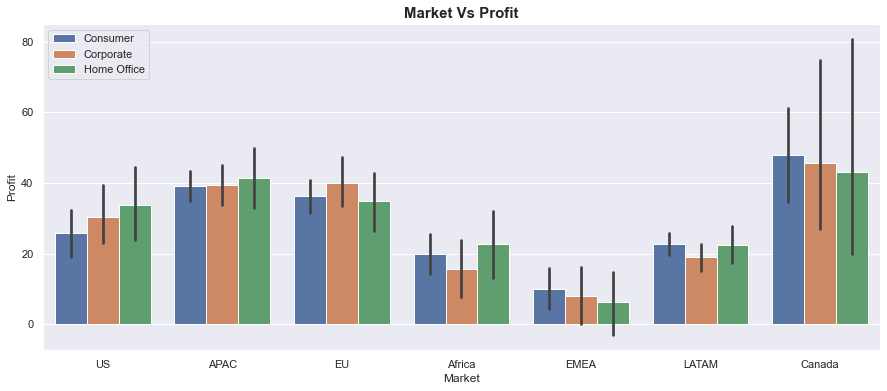

In [17]:
bar('Market', 'Profit')

#### Insights from the Graph:
* We can see maximum profit were made by Market **'Canada'** which was followed by **'APAC'**.

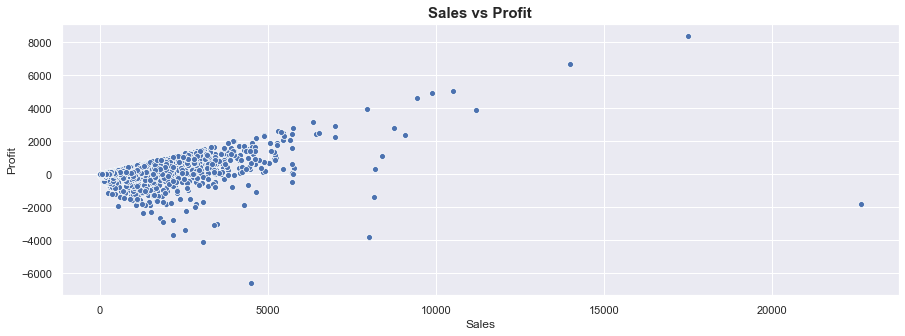

In [18]:
plt.figure(figsize = (15,5))
sns.scatterplot(x = 'Sales', y = 'Profit', data = global_store)
plt.title('Sales vs Profit', fontsize = 15, fontweight = 'bold')
plt.show()

## *4. Data Preparation.*
### *4.1 Data Cleaning.*

In [19]:
# Dropping 'Market' and 'Segment'.

global_store = global_store.drop(['Market','Segment'],axis=1)
global_store.head()

,Order Date,Sales,Profit,Market_Segment
0,31-07-2012,2309.650,762.1845,US_Consumer
1,05-02-2013,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,5175.171,919.9710,APAC_Consumer
3,28-01-2013,2892.510,-96.5400,EU_Home Office
4,05-11-2013,2832.960,311.5200,Africa_Consumer


In [20]:
# Grouping the Data by 'Order Date'.

global_store['Order Date'] = pd.to_datetime(global_store['Order Date']).dt.to_period('m')
global_store= global_store.sort_values(by=['Order Date'])
global_store.head()

,Order Date,Sales,Profit,Market_Segment
15262,2011-01,139.65,15.30,EU_Corporate
26744,2011-01,88.44,15.84,EU_Consumer
48614,2011-01,11.43,4.11,EU_Corporate
9417,2011-01,491.00,122.70,LATAM_Consumer
48590,2011-01,4.71,0.00,US_Home Office


In [21]:
# Defining a dataset to get aggregated value of profit for each Market_Segment.

global_store_profit= global_store.pivot_table(index='Order Date', values='Profit', columns='Market_Segment', aggfunc='sum')
print('--'*30)
print('Dimension of global_store_profit:', global_store_profit.shape)
print('--'*30)
global_store_profit.head()

------------------------------------------------------------
Dimension of global_store_profit: (48, 21)
------------------------------------------------------------


Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,EMEA_Corporate,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,555.426,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,1067.562,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,698.502,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,178.314,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,964.140,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


***As we can see, we have the data for 48 months, for the 21 Market_Segments.***

### *4.2 Calculating Covariance.*

In [22]:
# Splitting the Data into 'Train' and 'Test'.

train_len = 42
train = global_store_profit[:train_len]
test = global_store_profit[train_len:]

train.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,EMEA_Corporate,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,555.426,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,1067.562,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,698.502,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,178.314,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,964.140,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [23]:
Mean = np.mean(train)
StD = np.std(train)

# Creating a new Dataframe for Covariance with Columns 'Market_Segment', 'Mean', 'StD' and 'CoV'.
CoV = pd.DataFrame(Mean)
CoV['StD'] = StD
CoV['CoV'] = StD / Mean
CoV = CoV.reset_index()
# Naming the Columns.
CoV.columns = ['Market_Segment', 'Mean', 'StD', 'CoV']

CoV.sort_values(by = 'CoV', ascending = True, inplace = True)
CoV

,Market_Segment,Mean,StD,CoV
0,APAC_Consumer,4400.894243,2300.457687,0.522725
1,APAC_Corporate,2574.919807,1364.837734,0.530051
12,EU_Consumer,3699.977143,2202.282289,0.595215
15,LATAM_Consumer,2295.555697,1569.632686,0.683770
13,EU_Corporate,2216.299429,1600.336696,0.722076
16,LATAM_Corporate,1122.633016,990.360880,0.882177
14,EU_Home Office,1224.456536,1148.627937,0.938072
2,APAC_Home Office,1511.088314,1523.508658,1.008219
18,US_Consumer,2686.740912,2715.031412,1.010530
19,US_Corporate,1754.199083,1880.200775,1.071829


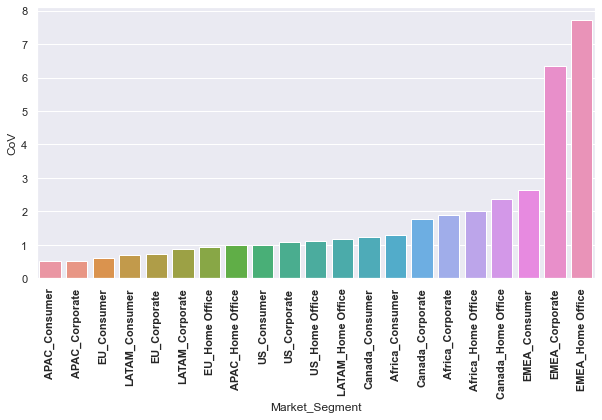

In [24]:
# Plotting a Barplot for visualizing the Spread of variance across the Market_Segment.

plt.figure(figsize = (10,5))
sns.barplot(x = 'Market_Segment', y = 'CoV', data=CoV)
plt.xticks(rotation = 90, fontweight = 'bold')
plt.show()

***Observations:***
* *From the above table we can see that the Lowest Cov(Covariance) is **0.522725**, wich corresponds to **APAC_Consumer**.*
* *Hence the most profitable Market_Segment is APAC_Consumer.*
* *Since we were asked to forecast for the most profitable Market_Segment, we will be using **APAC_Consumer** for model building.*

In [25]:
# Filtering the Dataframe for most consistant Market-Segment.

store_profit = global_store[global_store['Market_Segment'] == 'APAC_Consumer']
print('--'*20)
print('Dimension of store_profit:', store_profit.shape)
print('--'*20)
store_profit.head()

----------------------------------------
Dimension of store_profit: (5699, 4)
----------------------------------------


,Order Date,Sales,Profit,Market_Segment
1080,2011-01,1429.050,371.490,APAC_Consumer
9203,2011-01,219.780,59.340,APAC_Consumer
19331,2011-01,342.510,54.600,APAC_Consumer
26270,2011-01,102.762,1.842,APAC_Consumer
14830,2011-01,420.420,147.000,APAC_Consumer


In [26]:
# Convert the Order-Date columm.

store_profit['Order Date'] = store_profit['Order Date'].astype(str)
store_profit['Order Date'] = pd.to_datetime(store_profit['Order Date'])
store_profit.head()

,Order Date,Sales,Profit,Market_Segment
1080,2011-01-01,1429.050,371.490,APAC_Consumer
9203,2011-01-01,219.780,59.340,APAC_Consumer
19331,2011-01-01,342.510,54.600,APAC_Consumer
26270,2011-01-01,102.762,1.842,APAC_Consumer
14830,2011-01-01,420.420,147.000,APAC_Consumer


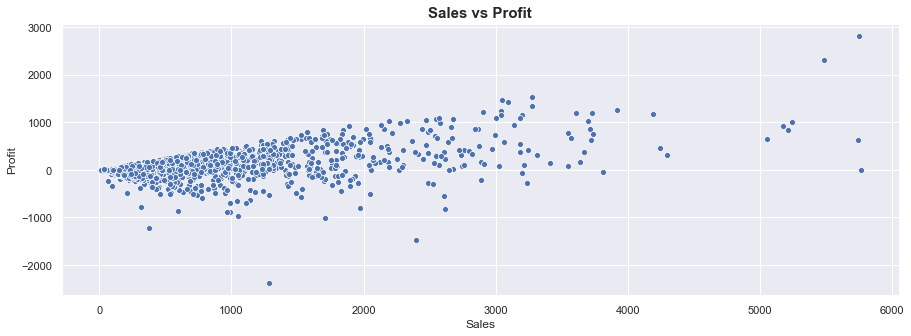

In [27]:
plt.figure(figsize = (15,5))
sns.scatterplot(x = 'Sales', y = 'Profit', data = store_profit)
plt.title('Sales vs Profit', fontsize = 15, fontweight = 'bold')
plt.show()

In [28]:
# Grouping the Dataframe by Order Date.

store_profit = pd.DataFrame(store_profit.groupby('Order Date')['Sales'].sum())
print('--'*20)
print('Dimension of store_profit:', store_profit.shape)
print('--'*20)
store_profit.head()

----------------------------------------
Dimension of store_profit: (48, 1)
----------------------------------------


,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


## *5. Time Series Analysis.*
### *5.1 Plot time series data.*

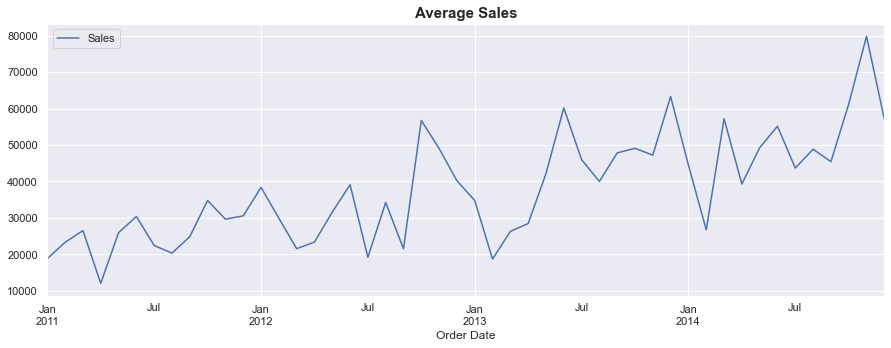

In [29]:
store_profit.plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Average Sales', fontweight = 'bold', fontsize = 15)
plt.show(block=False)

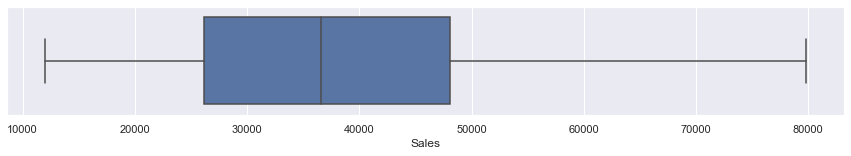

In [30]:
fig = plt.subplots(figsize = (15, 2))
ax = sns.boxplot(x=store_profit['Sales'], whis = 1.5)

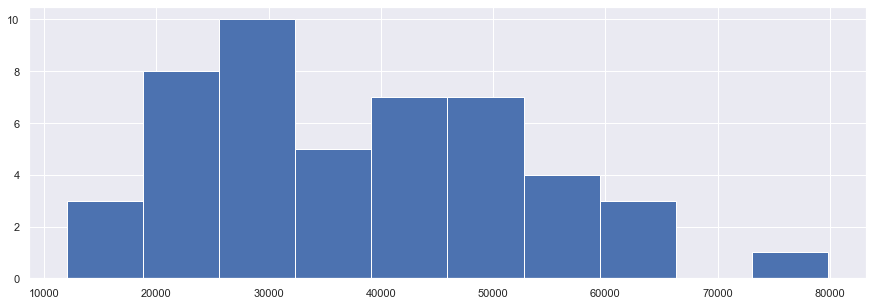

In [31]:
fig = store_profit.Sales.hist(figsize = (15,5))

***Observations:***
* *We can observe that there are no outliers present in the data so we can move ahead with building the model.*

### *5.2 Time Series Decomposition.*
#### *5.2.1 Additive Seasonal Decomposition.*

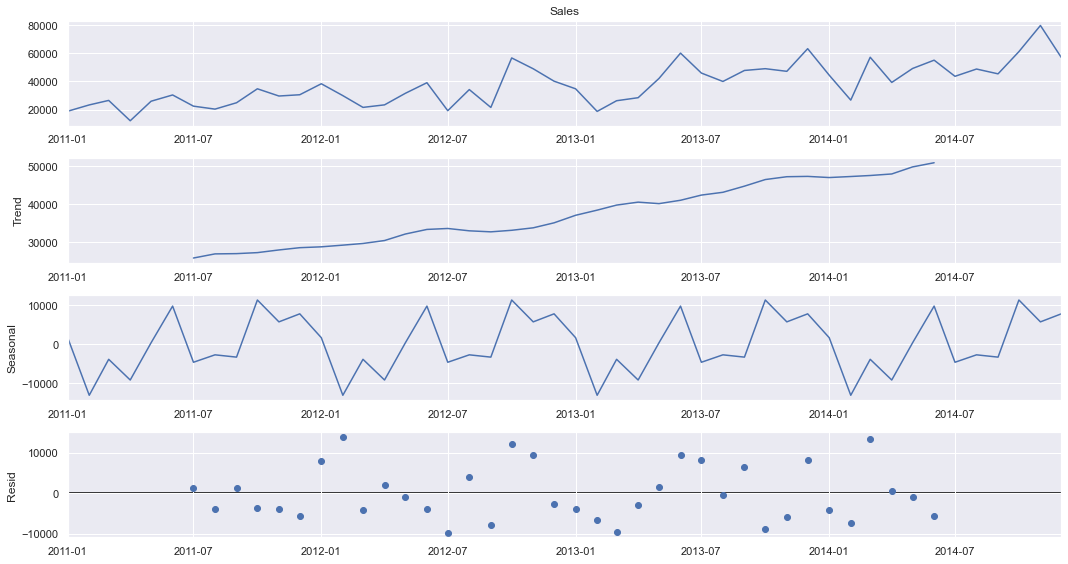

In [32]:
from pylab import rcParams
import statsmodels.api as sm


rcParams['figure.figsize'] = 15, 8
decomposition = sm.tsa.seasonal_decompose(store_profit.Sales, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

#### *5.2.2 Multiplicative Seasonal Decomposition.*

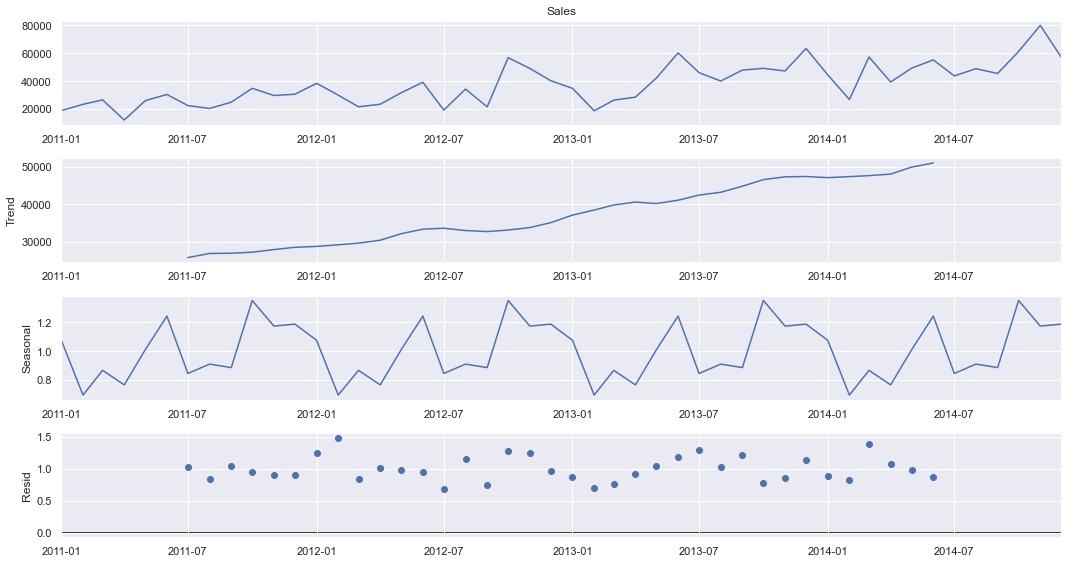

In [33]:
decomposition = sm.tsa.seasonal_decompose(store_profit.Sales, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

***Observations:***
* *It is quite evident that the trend is steadily increasing.*
* *The seasonality extract shows a slight dip in sales during the month of January and July every year.*
* *In general, sales are higher in the middle of the year.*

## *6. Building and Evaluating Time Series Forecast.*

In [34]:
# Splitting 'store_profit' into train and test for the Time Series Analysis. 
train_len = 42
train = store_profit[:train_len]
test = store_profit[train_len:]

In [35]:
# Defination for Plotting the Time Series.

def plot_forecast(i,j):
    plt.figure(figsize=(15,5))
    plt.plot(train['Sales'], label = 'Train')
    plt.plot(test['Sales'], label = 'Test')
    plt.plot(i, label = '{} forecast'.format(j))
    plt.legend(loc = 'best')
    plt.title('{} Method'.format(j))
    plt.show()

### *6.1 Simple Exponential Smoothing.*

In [36]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(optimized = True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)

F:\maNIaK\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


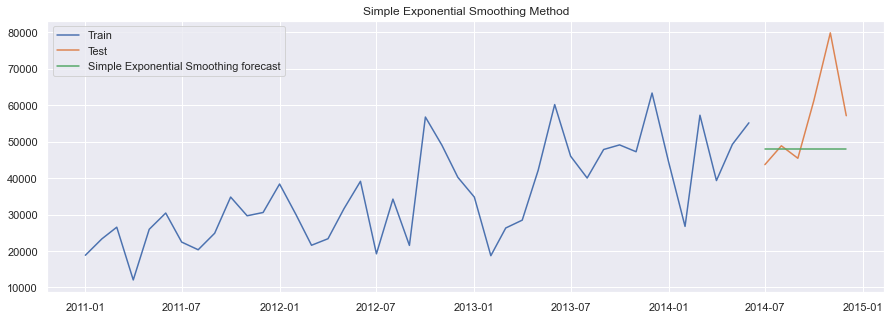

In [37]:
plot_forecast(y_hat_ses['ses_forecast'], 'Simple Exponential Smoothing')

In [38]:
from sklearn.metrics import mean_squared_error

# Simple Exponential Smoothing Method
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales'] - y_hat_ses['ses_forecast']) / test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = results[['Method', 'RMSE', 'MAPE']]
results    

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14764.66,15.83


In [39]:
# Defination for Evaluating the Built models.

def evaluate(i, j):
    rmse = np.sqrt(mean_squared_error(test['Sales'], i)).round(2)
    mape = np.round(np.mean(np.abs(test['Sales'] - i) / test['Sales'])*100,2)
    
    tempResults = pd.DataFrame({'Method':['{} Method'.format(j)], 'RMSE': [rmse],'MAPE': [mape] })
    global results
    results = pd.concat([results, tempResults])
    results = results[['Method', 'RMSE', 'MAPE']]
    return results

### *6.2 Holt's Exponential Smoothing.*

In [40]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods = 12 ,trend = 'additive', seasonal = None)
model_fit = model.fit(optimized = True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.00011457332972841143, 'smoothing_slope': 0.00011456959653301734, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 18311.05087727047, 'initial_slope': 819.857846927046, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


F:\maNIaK\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


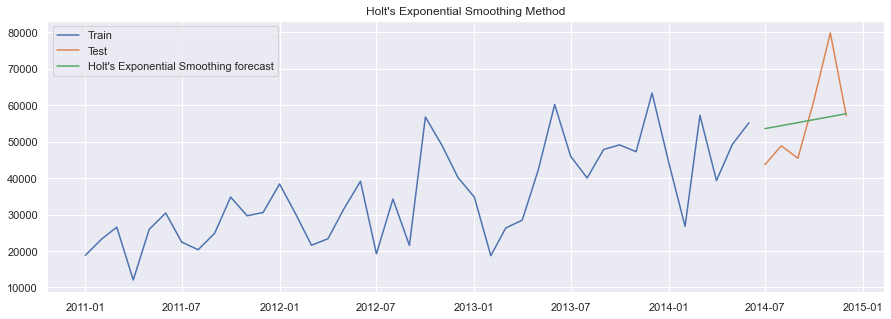

In [41]:
plot_forecast(y_hat_holt['holt_forecast'], "Holt's Exponential Smoothing")

In [42]:
evaluate(y_hat_holt['holt_forecast'], "Holt's Exponential Smoothing")

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14764.66,15.83
0,Holt's Exponential Smoothing Method,11402.24,15.63


### *6.3 Holt-Winter’s Exponential Smoothing - Additive.*

In [43]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.026947915865424013, 'smoothing_slope': 0.026947914467738976, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 30370.902628725915, 'initial_slope': 649.8325776031381, 'initial_seasons': array([ -9506.65873936, -19508.53724838, -12046.60418522, -19969.23736381,
        -9232.90515972,  -1016.67002323, -14185.4541823 , -12965.61452643,
       -13290.99275988,   1024.668988  ,  -4575.22686286,  -2683.50853795]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


F:\maNIaK\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


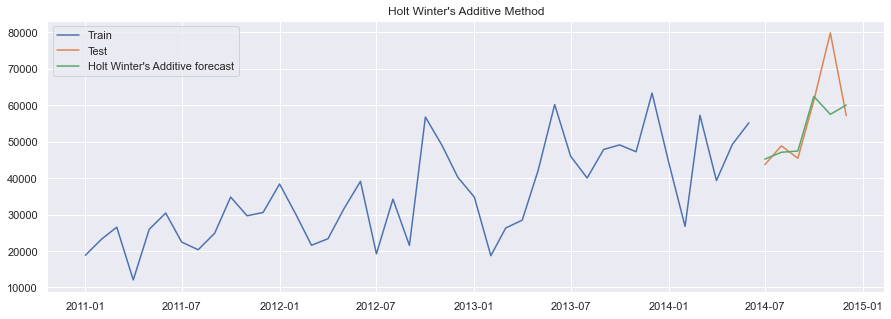

In [44]:
plot_forecast(y_hat_hwa['hw_forecast'], "Holt Winter's Additive")

In [45]:
evaluate(y_hat_hwa['hw_forecast'], "Holt Winter's Additive")

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14764.66,15.83
0,Holt's Exponential Smoothing Method,11402.24,15.63
0,Holt Winter's Additive Method,9304.48,7.76


### *6.4 Holt-Winter’s Exponential Smoothing - Multiplicative.*

In [46]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.0001743699162834022, 'smoothing_slope': 0.00017436800205013333, 'smoothing_seasonal': 0.0005273030415577813, 'damping_slope': nan, 'initial_level': 34110.96532936017, 'initial_slope': 730.4169702967649, 'initial_seasons': array([0.71316265, 0.48521395, 0.68070858, 0.52962281, 0.7385419 ,
       0.901911  , 0.62145787, 0.6545268 , 0.64684965, 0.93184221,
       0.8270268 , 0.88324517]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


F:\maNIaK\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


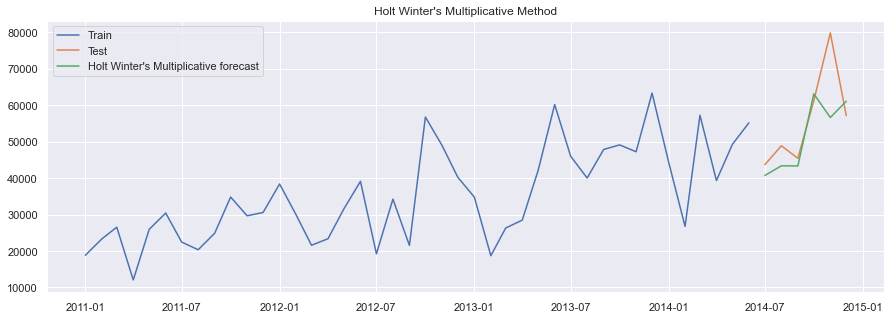

In [47]:
plot_forecast(y_hat_hwm['hw_forecast'], "Holt Winter's Multiplicative")

In [48]:
evaluate(y_hat_hwm['hw_forecast'], "Holt Winter's Multiplicative")

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14764.66,15.83
0,Holt's Exponential Smoothing Method,11402.24,15.63
0,Holt Winter's Additive Method,9304.48,7.76
0,Holt Winter's Multiplicative Method,10021.79,10.30


### *6.5 Auto Regressive Methods.*
#### *6.5.1 Stationarity vs Non-Stationary Time Series.*

***Augmented Dickey-Fuller (ADF) Test***

* *Null Hypothesis  (H0) : The series is not stationary  p−value > 0.05.* 
* *Alternate Hypothesis: (H1)  The series is stationary  p−value <= 0.05.*

In [49]:
# ADF Test
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(store_profit['Sales'])

print('--'*30)
print('ADF Statistic: %f' % adf_test[0])
print('--'*30)
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('--'*30)
print('p-value: %f' % adf_test[1])
print('--'*30)

------------------------------------------------------------
ADF Statistic: -3.376024
------------------------------------------------------------
Critical Values @ 0.05: -2.93
------------------------------------------------------------
p-value: 0.011804
------------------------------------------------------------


###### Insights:
* *p-value is 0.011804 < 0.05, Fail to Reject the Alternate Hypothesis(H1).* 
* *The series is stationary.*

***Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test***

* *Null Hypothesis  (H0) : The series is stationary  p−value > 0.05.* 
* *Alternate Hypothesis: (H1)  The series is not stationary  p−value <= 0.05.*

In [50]:
# KPSS Test
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(store_profit['Sales'])

print('--'*30)
print('KPSS Statistic: %f' % kpss_test[0])
print('--'*30)
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('--'*30)
print('p-value: %f' % kpss_test[1])
print('--'*30)

------------------------------------------------------------
KPSS Statistic: 0.577076
------------------------------------------------------------
Critical Values @ 0.05: 0.46
------------------------------------------------------------
p-value: 0.024720
------------------------------------------------------------


###### Insights:
* *p-value is 0.024720 < 0.05, Fail to Reject the Alternate Hypothesis(H1).* 
* *The series is not stationary.*

***Box Cox Transformation to make Variance Constant***

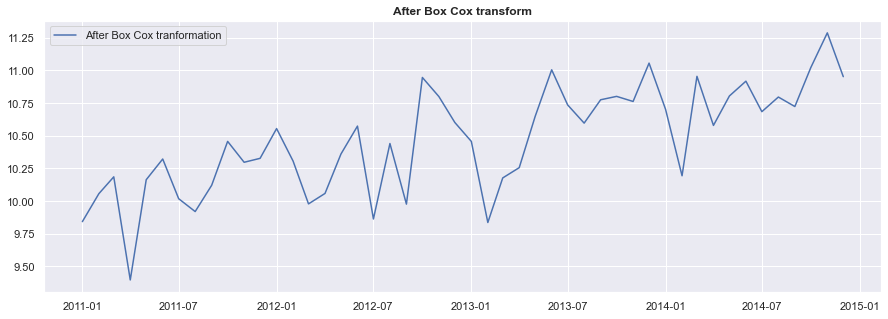

In [51]:
from scipy.stats import boxcox

data_boxcox = pd.Series(boxcox(store_profit['Sales'], lmbda=0), index = store_profit.index)

plt.figure(figsize=(15,5))
plt.plot(data_boxcox, label = 'After Box Cox tranformation')
plt.legend(loc = 'best')
plt.title('After Box Cox transform', fontweight = 'bold')
plt.show()

***Differencing to Remove Trend***

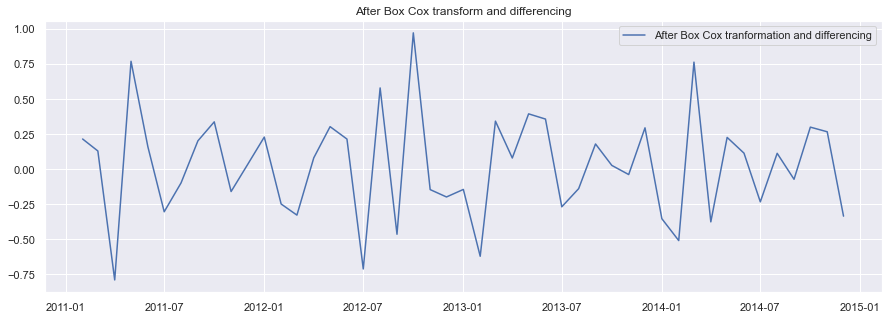

In [52]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), store_profit.index)
plt.figure(figsize = (15,5))
plt.plot(data_boxcox_diff, label = 'After Box Cox tranformation and differencing')
plt.legend(loc = 'best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [53]:
data_boxcox_diff.dropna(inplace=True)

data_boxcox_diff.tail()

Order Date
2014-08-01    0.112012
2014-09-01   -0.072673
2014-10-01    0.298459
2014-11-01    0.265449
2014-12-01   -0.335151
dtype: float64

***ADF test after Box-Cox and Differencing***

In [54]:
adf_test = adfuller(data_boxcox_diff)

print('--'*30)
print('ADF Statistic: %f' % adf_test[0])
print('--'*30)
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('--'*30)
print('p-value: %f' % adf_test[1])
print('--'*30)

------------------------------------------------------------
ADF Statistic: -4.535011
------------------------------------------------------------
Critical Values @ 0.05: -2.95
------------------------------------------------------------
p-value: 0.000170
------------------------------------------------------------


###### Insights:
* *p-value is 0.000170 < 0.05, Fail to Reject the Null Hypothesis(H0).* 
* *The series is stationary.*

***KPSS test after Box-Cox and Differencing***

In [55]:
kpss_test = kpss(data_boxcox_diff)

print('--'*30)
print('KPSS Statistic: %f' % kpss_test[0])
print('--'*30)
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('--'*30)#### p-value is 0.100 >= 0.05, Fail to reject the null hypothesis  (H0) 
#### The series is stationary
print('p-value: %f' % kpss_test[1])
print('--'*30)

------------------------------------------------------------
KPSS Statistic: 0.156456
------------------------------------------------------------
Critical Values @ 0.05: 0.46
------------------------------------------------------------
p-value: 0.100000
------------------------------------------------------------


F:\maNIaK\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


###### Insights:
* *p-value is 0.100 > 0.05, Fail to Reject the Null Hypothesis(H0).* 
* *The series is stationary.*

***After performing the Stationarity Test we can see that we have succeeded in converting a non-stationary series into a stationary series for building an auto-regressive model.***

*We will be driectly using **p = 1**, **q = 1** and **d = 1** since the forecasts are relatively better for these values.*

In [56]:
# Splitting Train and Test data on data_boxcox and data_boxcox_diff.

train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]


train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

#### *6.5.2 Auto Regression(AR) Method.*

In [57]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

F:\maNIaK\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


const      0.024255
ar.L1.y   -0.406729
dtype: float64


In [58]:
# Recovering Original Time Series.

y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

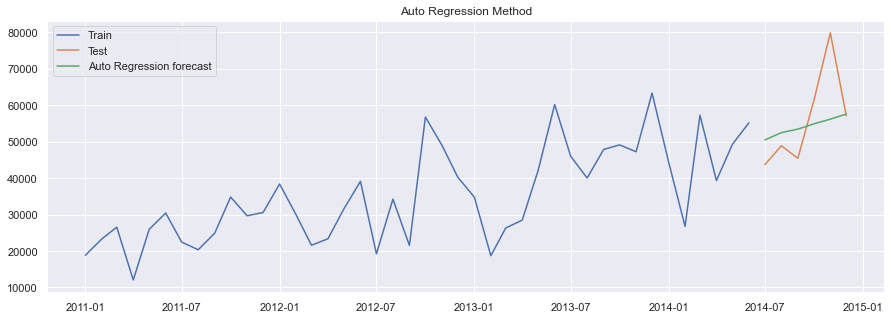

In [59]:
plot_forecast(y_hat_ar['ar_forecast'][test.index.min():], 'Auto Regression')

In [60]:
evaluate(y_hat_ar['ar_forecast'][test.index.min():], 'Auto Regression')

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14764.66,15.83
0,Holt's Exponential Smoothing Method,11402.24,15.63
0,Holt Winter's Additive Method,9304.48,7.76
0,Holt Winter's Multiplicative Method,10021.79,10.30
0,Auto Regression Method,10985.28,13.56


#### *6.5.3 Moving Average(MA) Method.*

In [61]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.021415
ma.L1.y   -1.000000
dtype: float64


F:\maNIaK\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [62]:
# Recovering Original Time Series.

y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

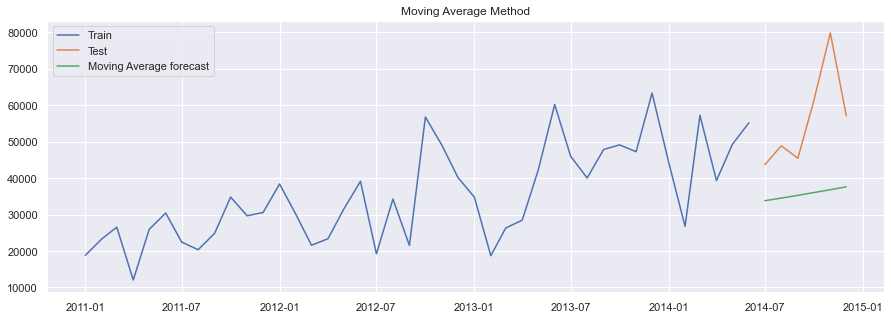

In [63]:
plot_forecast(y_hat_ma['ma_forecast'][test.index.min():], 'Moving Average')

In [64]:
evaluate(y_hat_ma['ma_forecast'][test.index.min():], 'Moving Average')

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14764.66,15.83
0,Holt's Exponential Smoothing Method,11402.24,15.63
0,Holt Winter's Additive Method,9304.48,7.76
0,Holt Winter's Multiplicative Method,10021.79,10.30
0,Auto Regression Method,10985.28,13.56
0,Moving Average Method,23360.02,33.93


#### *6.5.4 Auto Regression Moving Average(ARMA) Method.*

In [65]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.02147
ar.L1.y    0.07458
ma.L1.y   -1.00000
dtype: float64


F:\maNIaK\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [66]:
# Recovering Original Time Series.

y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

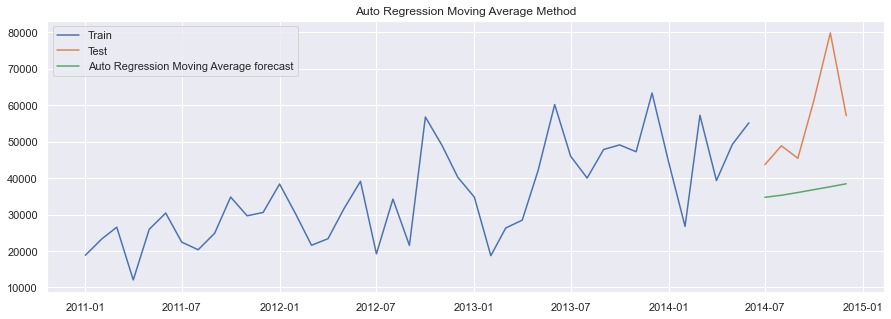

In [67]:
plot_forecast(y_hat_arma['arma_forecast'][test.index.min():], 'Auto Regression Moving Average')

In [68]:
evaluate(y_hat_arma['arma_forecast'][test.index.min():], 'Auto Regression Moving Average')

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14764.66,15.83
0,Holt's Exponential Smoothing Method,11402.24,15.63
0,Holt Winter's Additive Method,9304.48,7.76
0,Holt Winter's Multiplicative Method,10021.79,10.30
0,Auto Regression Method,10985.28,13.56
0,Moving Average Method,23360.02,33.93
0,Auto Regression Moving Average Method,22654.32,32.40


#### *6.5.5 Auto Regressive Integrated Moving Average(ARIMA) Method.*

In [69]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


F:\maNIaK\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
F:\maNIaK\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [70]:
# Recovering Original Time Series.

y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

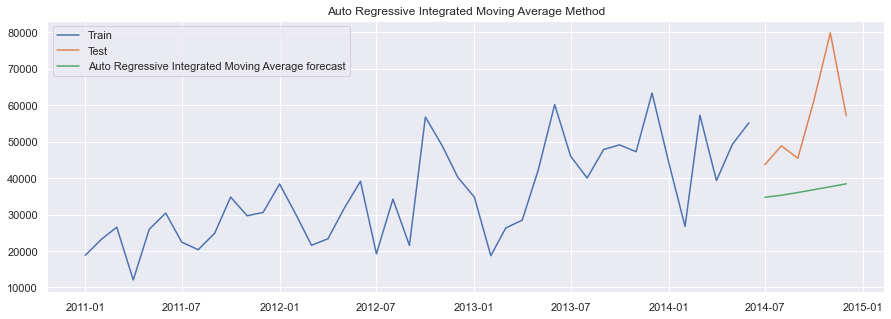

In [71]:
plot_forecast(y_hat_arima['arima_forecast'][test.index.min():], 'Auto Regressive Integrated Moving Average')

In [72]:
evaluate(y_hat_arima['arima_forecast'][test.index.min():], 'Auto Regressive Integrated Moving Average')

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14764.66,15.83
0,Holt's Exponential Smoothing Method,11402.24,15.63
0,Holt Winter's Additive Method,9304.48,7.76
0,Holt Winter's Multiplicative Method,10021.79,10.30
0,Auto Regression Method,10985.28,13.56
0,Moving Average Method,23360.02,33.93
0,Auto Regression Moving Average Method,22654.32,32.40
0,Auto Regressive Integrated Moving Average Method,22654.32,32.40


#### *6.5.6 Seasonal Auto Regressive Integrated Moving Average(SARIMA) Method.*

In [73]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

F:\maNIaK\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
F:\maNIaK\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ar.L1      -0.042087
ma.L1      -0.996570
ar.S.L12    0.098631
ma.S.L12   -0.967648
sigma2      0.058484
dtype: float64


In [74]:
# Recovering Original Time Series.

y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

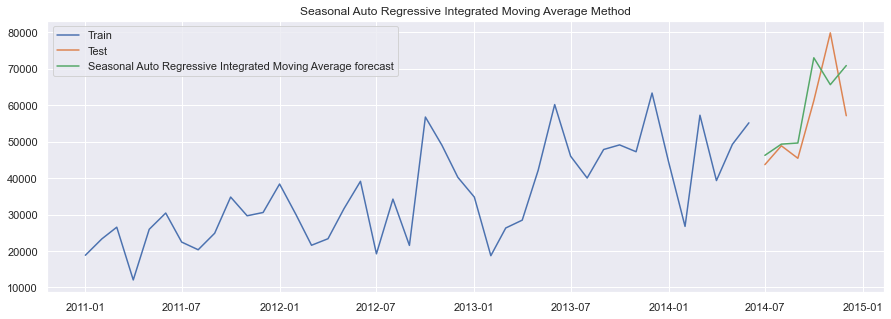

In [75]:
plot_forecast(y_hat_sarima['sarima_forecast'][test.index.min():], 'Seasonal Auto Regressive Integrated Moving Average')

In [76]:
evaluate(y_hat_sarima['sarima_forecast'][test.index.min():], 'Seasonal Auto Regressive Integrated Moving Average')

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14764.66,15.83
0,Holt's Exponential Smoothing Method,11402.24,15.63
0,Holt Winter's Additive Method,9304.48,7.76
0,Holt Winter's Multiplicative Method,10021.79,10.30
0,Auto Regression Method,10985.28,13.56
0,Moving Average Method,23360.02,33.93
0,Auto Regression Moving Average Method,22654.32,32.40
0,Auto Regressive Integrated Moving Average Method,22654.32,32.40
0,Seasonal Auto Regressive Integrated Moving Ave...,9612.36,12.86


Among the Auto Regressive models, the **SARIMA** method produced the best plot and the lowest MAPE, since there was seasonality in the data. **SARIMA** is therefore preferred among all autoregressive methods.

## *6. Conclsion.*

* *The most profitable segment is **APAC_Consumer** segment as it has the lowest COV value of all segments which means that it has high sales.*
* *In the smoothing technique, **Holt Winter's Additive Method** is a better forecasting method.*
* In the set of ARIMA techniques, **SARIMA** is the most effective.

The RMSE and MAPE values of Holt Winters' additive method and SARIMA are the lowest. Nonetheless, looking at the forecast plot, we can see that SARIMA has much better forecasting. Consequently, if we consider only smoothing techniques, Holt Winter's additive forecasting method will be best, while from the several ARIMA methods SARIMA is the best. For this case study, SARIMA forecasting method is the best approach.